In [1]:
import pandas as pd

df = pd.read_csv("../Data/Advertising.csv", index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


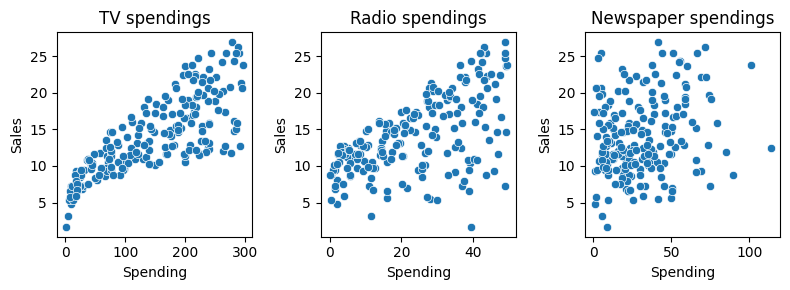

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 

number_features = df.shape[1] - 1
fig, ax = plt.subplots(1, number_features, figsize=(8,3), dpi=100)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, x=feature, y="Sales", ax=ax[i]) # hello seaborn
    ax[i].set(xlabel="Spending", title=f"{feature} spendings")

fig.tight_layout()

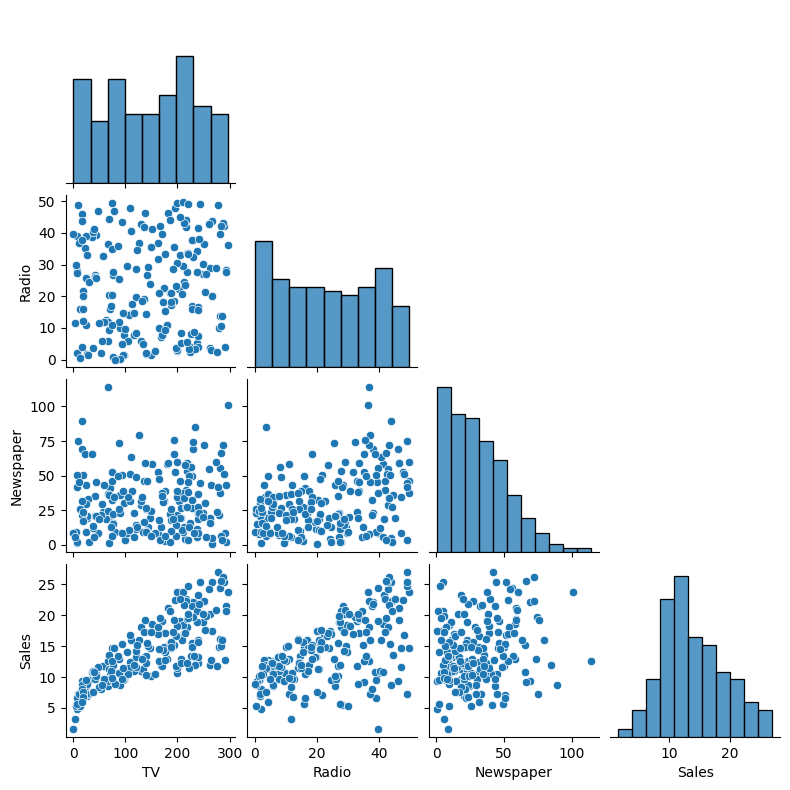

In [5]:
ax = sns.pairplot(df, corner=True, height=2)

In [6]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Intercept β0: 7.0326
Intercept β1: 0.0475


[Text(0.5, 1.0, 'TV advertisement linear regression'),
 Text(0.5, 0, 'Thousand dollars'),
 Text(0, 0.5, 'Sales thousand units')]

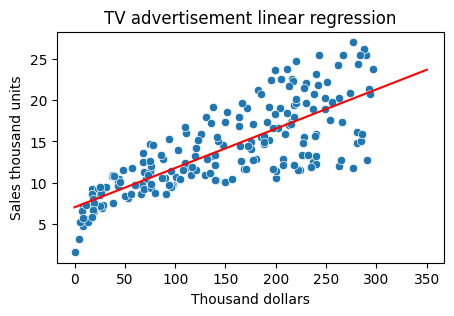

In [7]:
import numpy as np

X, y = df['TV'], df["Sales"]

beta_1, beta_0 = np.polyfit(X, y, deg=1)

y_hat = lambda x: beta_0 + beta_1*x

print(f"Intercept β0: {beta_0:.4f}")
print(f"Intercept β1: {beta_1:.4f}")

spend = np.linspace(0, 350)
fig, ax = plt.figure(figsize=(5,3), dpi=100), plt.axes()

sns.scatterplot(data=df, x="TV", y="Sales")
sns.lineplot(x=spend, y=y_hat(spend), color="red")

ax.set(title="TV advertisement linear regression",
       xlabel="Thousand dollars",
       ylabel="Sales thousand units")

<Axes: xlabel='TV', ylabel='Sales'>

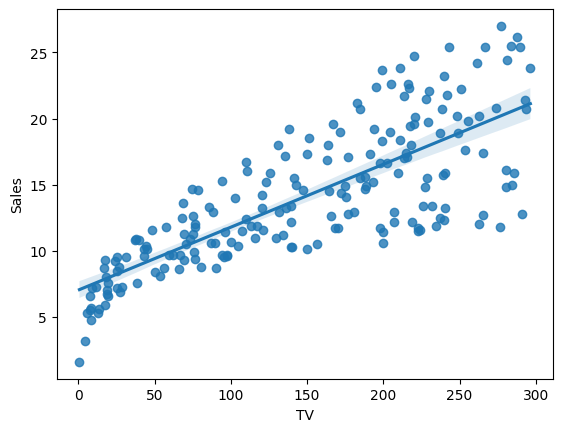

In [8]:
sns.regplot(x=X, y=y)

In [9]:
from sklearn.linear_model import LinearRegression

X, y = df.drop("Sales", axis="columns"), df["Sales"]
X.insert(0, "Intercept", 1)


In [10]:
train_fraction = int(len(df)*0.9)
val_fraction = int(train_fraction*0.4)
train = df.sample(n=train_fraction, random_state=42, replace=False)
val = train.sample(n=val_fraction, random_state=42, replace=False)
test = df.drop(train.index)
train = train.drop(val.index)



X_train, y_train = train.drop("Sales", axis="columns"), train["Sales"]
X_val, y_val = val.drop("Sales", axis="columns"), val["Sales"]
X_test, y_test = test.drop("Sales", axis="columns"), test["Sales"]

X_train.insert(0, "Intercept", 1)
X_val.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)

for dataset in  ["X_train", "X_val", "y_train", "y_val", "X_test", "y_test"]:
    print(f"Shape of {dataset}: {eval(dataset).shape}")


model = LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(X_val)

print(f"TV: ${X_val['TV'].iloc[0]}k, Radio: ${X_val['Radio'].iloc[0]}k, Newspaper: ${X_val['Newspaper'].iloc[0]}k predicts {y_hat[0]:.1f} thousand units")

Shape of X_train: (108, 4)
Shape of X_val: (72, 4)
Shape of y_train: (108,)
Shape of y_val: (72,)
Shape of X_test: (20, 4)
Shape of y_test: (20,)
TV: $237.4k, Radio: $27.5k, Newspaper: $11.0k predicts 19.5 thousand units


In [11]:
model = LinearRegression()

model.fit(X_train, y_train)

model.coef_

array([ 0.        ,  0.04789581,  0.19669936, -0.01163409])

$R^2$, förklaringsgraden:

In [12]:
model.score(X_val, y_val) 

0.8845045432964773

In [ ]:
n = len(y_val)
y_hat = model.predict(X_val)

MAE = np.divide(1, n) * np.sum(np.abs(y_val -y_hat))
MSE = np.divide(1, n) * np.sum(np.square(y_val - y_hat))
RMSE = np.sqrt(MSE)

MAE, RMSE

(np.float64(1.207699807407086), np.float64(1.5160123413508317))

Här borde vi köra på testdata, göra trendanalys och förfina modellen. Nästa gång förfinar vi modellen, men hela behandlingen väntar till nästa kurs!